
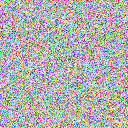

In [3]:
import os
import IPython.display
import graphcat
import imagecat.notebook

name = "uniform-color"

reference_path = os.path.abspath(f"../features/reference/{name}.icp")
failed_path = os.path.abspath(f"../features/failed/{name}.icp")

graph = graphcat.Graph()
imagecat.add_task(graph, "/load-reference", imagecat.operator.load, path=reference_path)
imagecat.add_task(graph, "/load-failed", imagecat.operator.load, path=failed_path);

IPython.display.display(IPython.display.HTML(f"<h1>Reference Image</h1><p>{reference_path}</p>"))
try:
    imagecat.notebook.display(graph.output("/load-reference"))
except Exception as e:
    print(e)

if os.path.exists(failed_path):
    IPython.display.display(IPython.display.HTML(f"<h1>Failed Image</h1><p>{failed_path}</p>"))
    imagecat.notebook.display(graph.output("/load-failed"))